In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob

In [66]:
# Load results from the D analysis
D   = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-09/clinvar-cosmic/clinvar-cosmic_D_summary.txt",delimiter='\t')
KAD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-09/clinvar-cosmic/clinvar-cosmic_KAD_summary.txt",delimiter='\t')
KBD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-09/clinvar-cosmic/clinvar-cosmic_KBD_summary.txt",delimiter='\t')

In [67]:
print "Number of structures evaluated:",
print len(D)

print "\nD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(D[D["p"]<0.01]),len(D[D["p"]<0.01]) / float(len(D)))
# print "Perm Z-Score: (%4d) %.4f"%(len(D[D["z_p"]<0.01]),len(D[D["z_p"]<0.01]) / float(len(D)))

print "\nKAD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAD[KAD["p"]<0.01]),len(KAD[KAD["p"]<0.01]) / float(len(KAD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KAD[KAD["z_p"]<0.01]),len(KAD[KAD["z_p"]<0.01]) / float(len(KAD)))

print "\nKBD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KBD[KBD["p"]<0.01]),len(KBD[KBD["p"]<0.01]) / float(len(KBD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KBD[KBD["z_p"]<0.01]),len(KBD[KBD["z_p"]<0.01]) / float(len(KBD)))

Number of structures evaluated: 301

D Proportion with nominally significant unweighted p-values:
Permutation:  (  13) 0.0432

KAD Proportion with nominally significant unweighted p-values:
Permutation:  (   9) 0.0299

KBD Proportion with nominally significant unweighted p-values:
Permutation:  (   6) 0.0199


In [68]:
from qvalue import estimate
THRESH = 0.1

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "Proteins passing an FDR of %.0f%% for K_clinvar - K_cosmic"%(THRESH*100)
print "Permutation: %4d"%(D["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_clinvar - K*"%(THRESH*100)
print "Permutation: %4d"%(KAD["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_cosmic - K*"%(THRESH*100)
print "Permutation: %4d"%(KBD["q"]<THRESH).sum()

Proteins passing an FDR of 10% for K_clinvar - K_cosmic
Permutation:    3

Proteins passing an FDR of 10% for K_clinvar - K*
Permutation:    4

Proteins passing an FDR of 10% for K_cosmic - K*
Permutation:    0


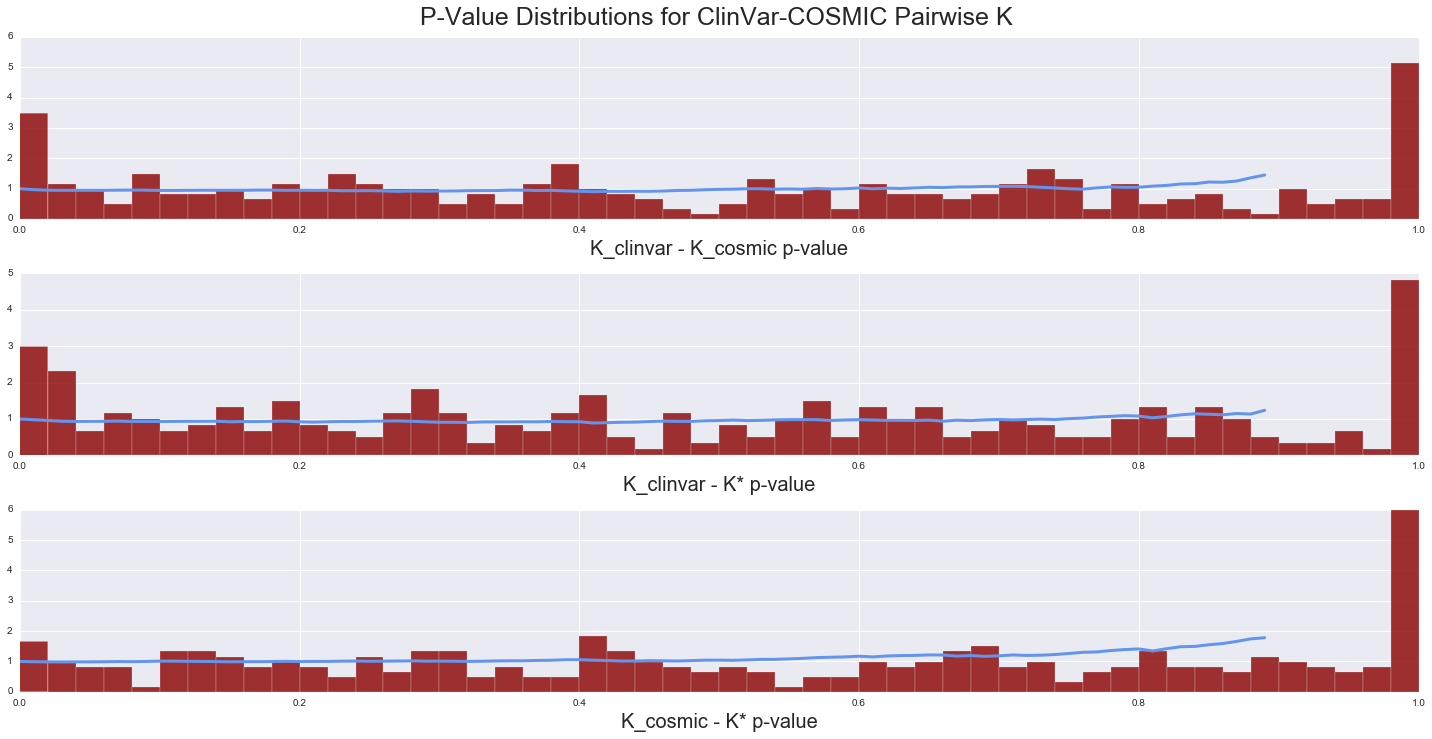

In [69]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ClinVar-COSMIC Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K_clinvar - K_cosmic p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K_clinvar - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K_cosmic - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

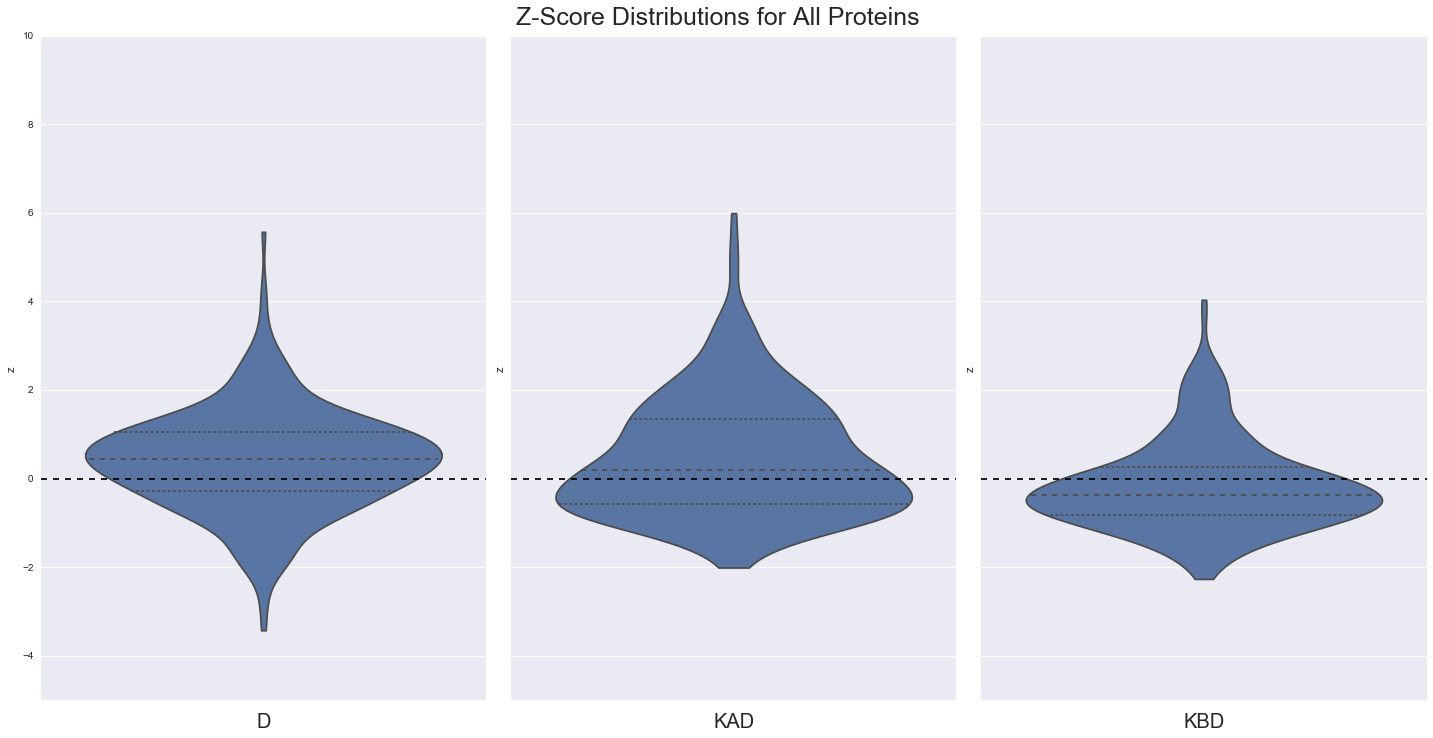

In [70]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D['z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,orient='v',inner='quart')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for All Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

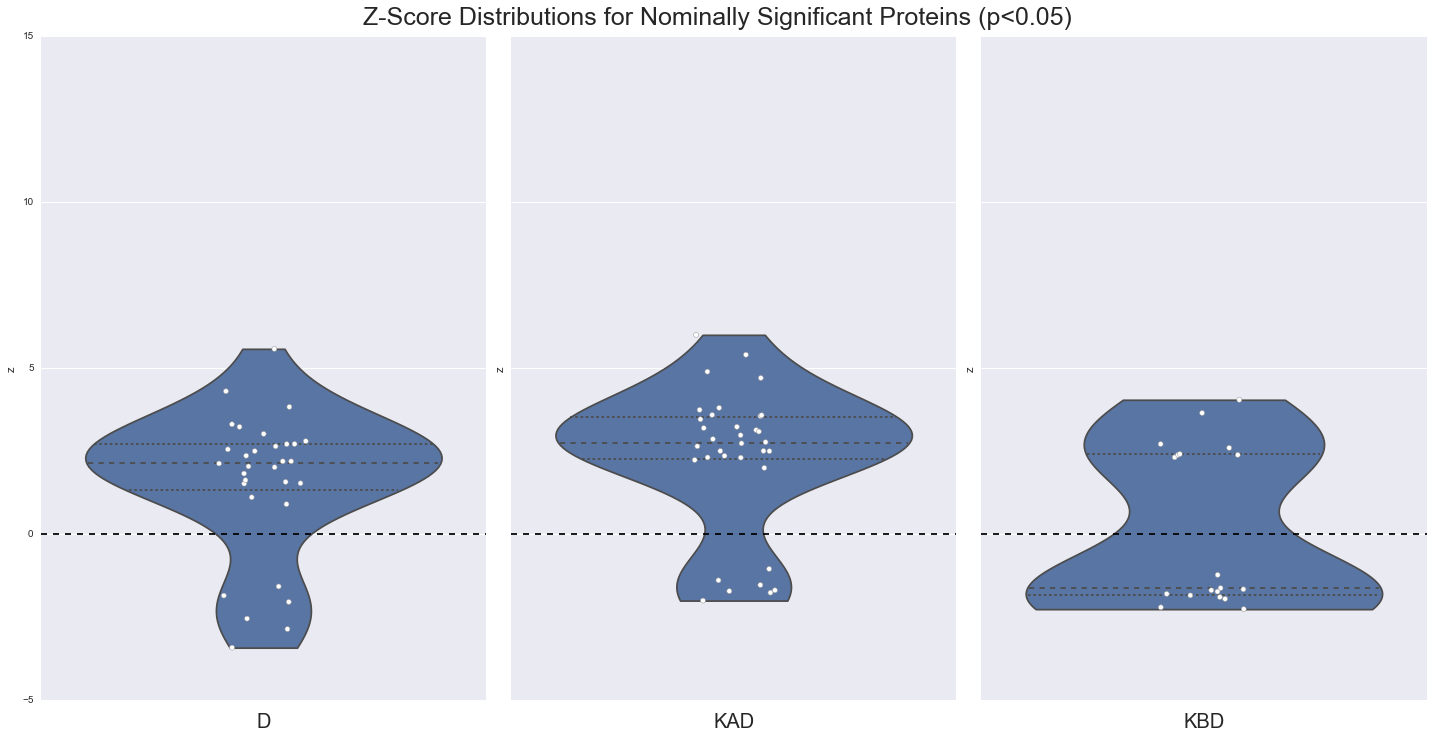

In [71]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.05,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.05,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.05)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [85]:
KBD[KBD['p']<0.05].sort_values(by="q")

,sid,chain,Na,Nb,KBD,p,z,z_p,optT,q
119,1SIQ,A,22,7,-1.308075,0.00500,-1.700412,0.089053,16,0.423808
276,2BXE,B,32,18,2.805194,0.00704,3.640717,0.000272,22,0.423808
84,1D5R,A,41,60,-1.956954,0.00382,-2.268768,0.023282,9,0.423808
226,3RCD,A,4,13,-1.935823,0.00660,-2.213228,0.026882,5,0.423808
251,3HFV,A,10,4,3.210857,0.00432,4.038183,0.000054,8,0.423808
277,3K71,D,12,11,-1.378789,0.00852,-1.808506,0.070528,24,0.427420
250,3KJO,A,3,11,-1.532819,0.01092,-1.854189,0.063712,6,0.469560
56,4AH6,D,6,8,1.858449,0.01594,2.378377,0.017389,9,0.575913
63,4FNW,A,8,12,-1.547336,0.01722,-1.905357,0.056734,6,0.575913
26,1HYN,S,4,7,1.961388,0.01918,2.379000,0.017360,9,0.577318


In [82]:
# Look for significant segregation
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K* (Spatial Segregation)"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K* (Spatial Segregation)


In [83]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K* (Spatial Correlation)"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K* (Spatial Correlation)


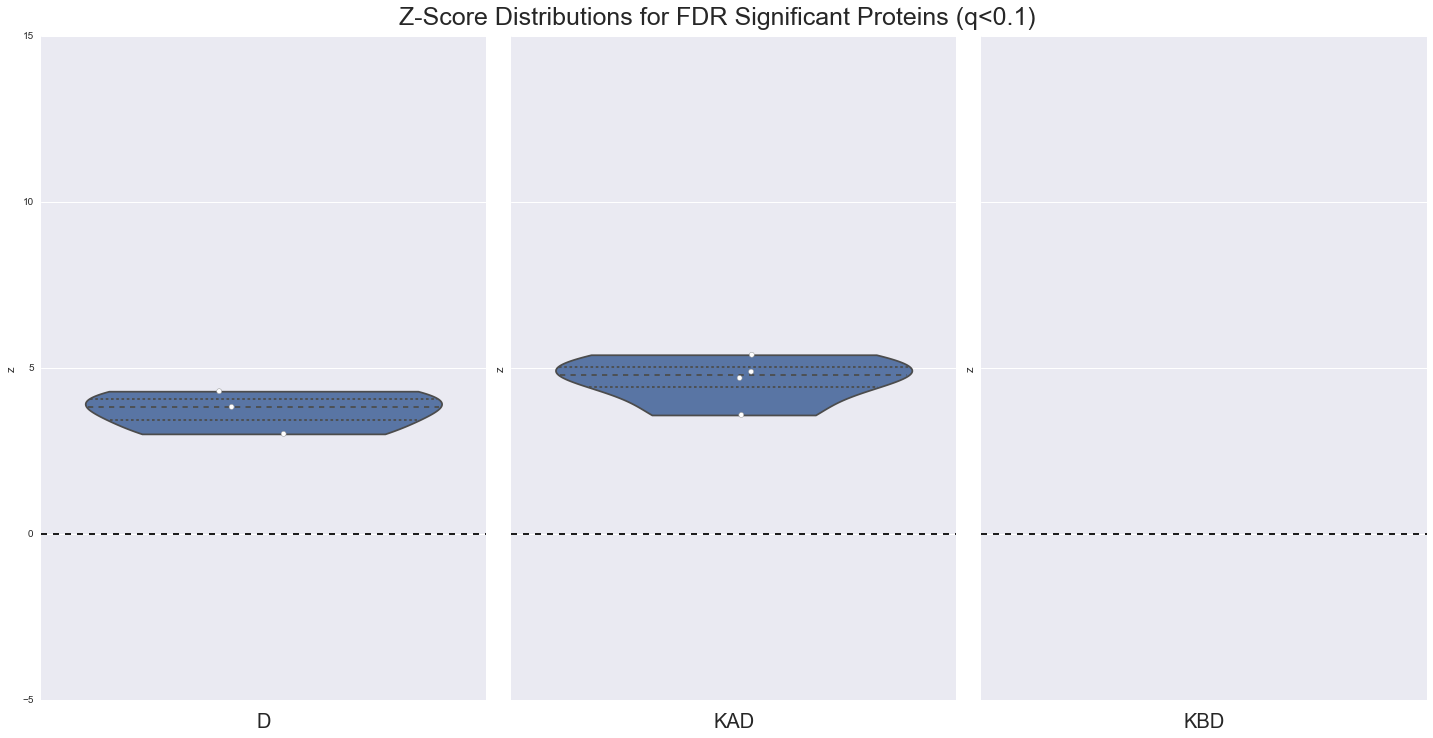

In [72]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['q']<0.1,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['q']<0.1,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for FDR Significant Proteins (q<0.1)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [73]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Nonsynonymous Neighbors"
print KAD.ix[KAD['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Synonymous Neighbors"
print KBD.ix[KBD['q']<0.1,["sid","chain","z","q"]]

FDR-Significant Difference in Clustered-ness:
      sid chain         z         q
51   1L5S     A  3.010990  0.046153
184  4F91     B  4.296240  0.024080
192  2RMN     A  3.823821  0.024080

FDR-Significant Preference in Nonsynonymous Neighbors
      sid chain         z        q
51   1L5S     A  4.695051  0.05418
72   4BGQ     A  3.580732  0.05418
184  4F91     B  4.885645  0.05418
192  2RMN     A  5.394821  0.05418

FDR-Significant Preference in Synonymous Neighbors
Empty DataFrame
Columns: [sid, chain, z, q]
Index: []


In [74]:
# Look for significant segregation
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


In [75]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


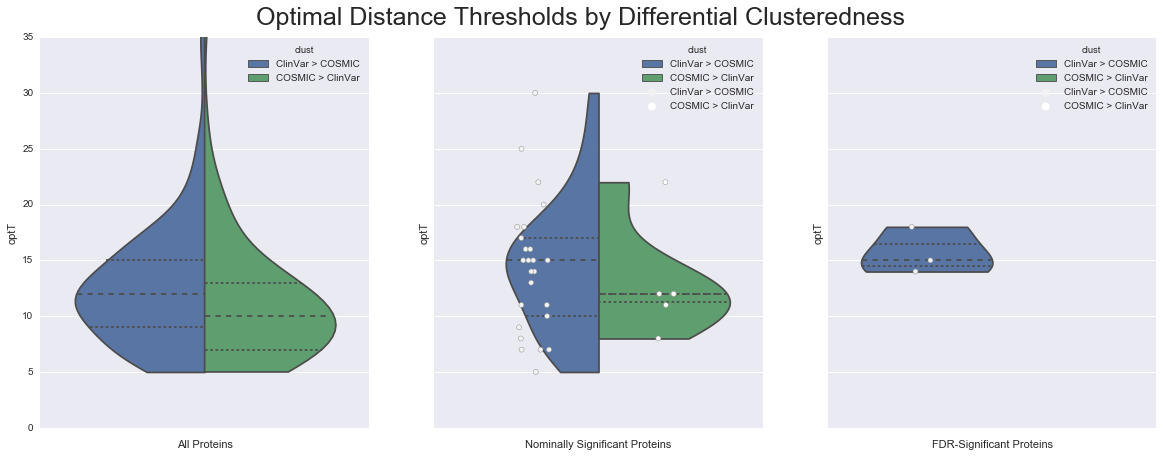

In [76]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
df = D.copy()
ho = ['ClinVar > COSMIC','COSMIC > ClinVar']
df.ix[df['z']>0.,'clust'] = 'ClinVar > COSMIC'
df.ix[df['clust'].isnull(),'clust'] = 'COSMIC > ClinVar'
df[''] = ''
plt.suptitle("Optimal Distance Thresholds by Differential Clusteredness",fontsize=25,y=.96)
sns.violinplot(x='',y='optT',hue='clust',data=df,split=True,cut=0,ax=ax[0],inner='quart',hue_order=ho)
ax[0].set_xlabel("All Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,cut=0,ax=ax[1],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[1])
ax[1].set_xlabel("Nominally Significant Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],cut=0,ax=ax[2],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[2])
ax[2].set_xlabel("FDR-Significant Proteins")
plt.ylim([0,35])
plt.show()

BELOW: Unique to Clinvar-COSMIC analysis.

ClinVar significant:   88
COSMIC significant:    14
Both significant:       5

Proteins where both ClinVar and COSMIC are significant:
ClinVar
    structid chain          K         Kz       Kp
112     1D5R     A  15.078570   8.857042  0.00002
376     2K60     A   4.567685   4.143031  0.00592
114     2SHP     B  22.002200  17.005326  0.00002
411     2WTK     C   6.654061   4.575626  0.00162
186     2Y1M     F   7.993468   7.801796  0.00008
COSMIC
     structid chain          K         Kz       Kp
979      1D5R     A  29.907608   5.301445  0.00002
3093     2K60     A   7.871961   5.868178  0.00016
2885     2SHP     B  20.779393  10.956133  0.00002
2591     2WTK     C  15.385441   5.474082  0.00006
2718     2Y1M     F  18.330471   8.240510  0.00002
D:
      sid chain         z        p
84   1D5R     A  2.118546  0.04048
91   2SHP     B -1.133333  0.26066
100  2WTK     C  1.610919  0.09232
148  2Y1M     F  0.269879  0.74360
KAD:
      sid chain         z        p
84   1D5R     A  1.570968 

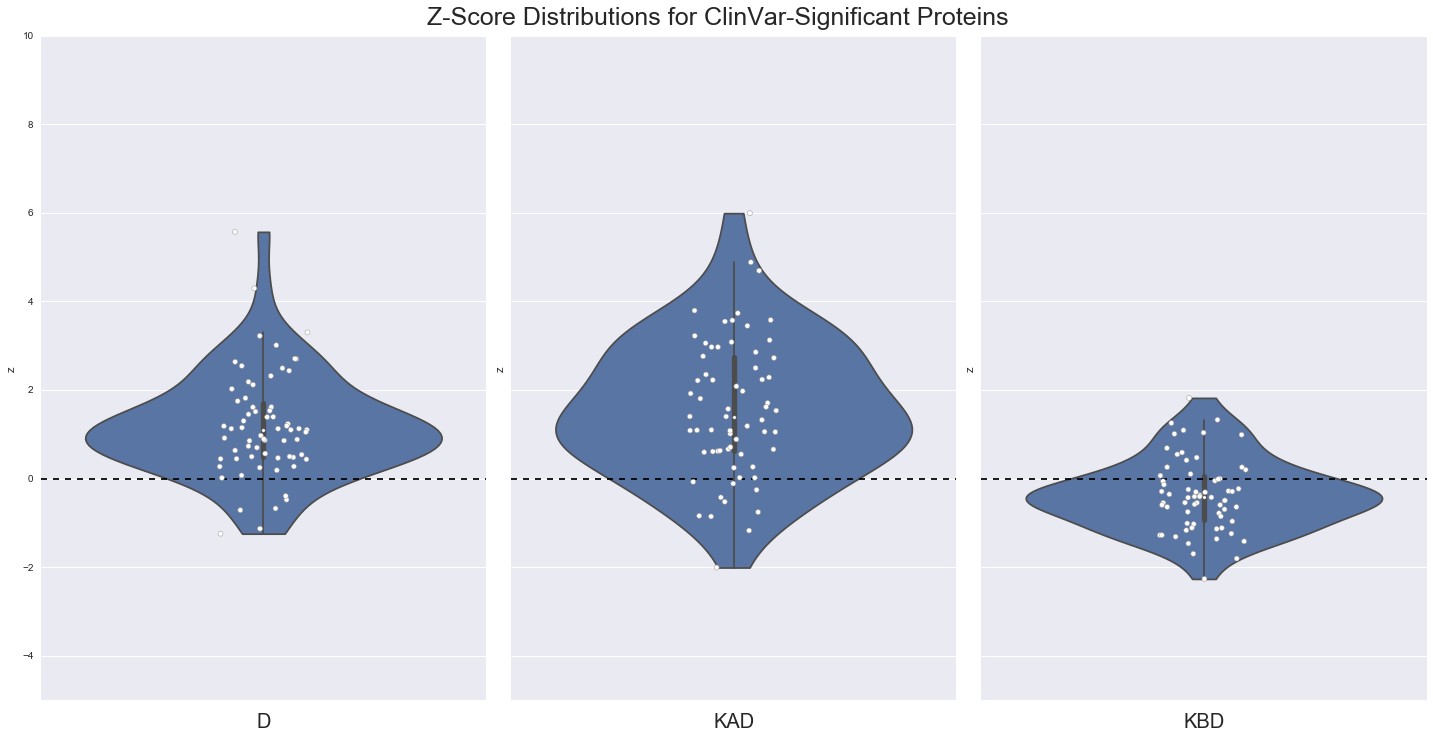

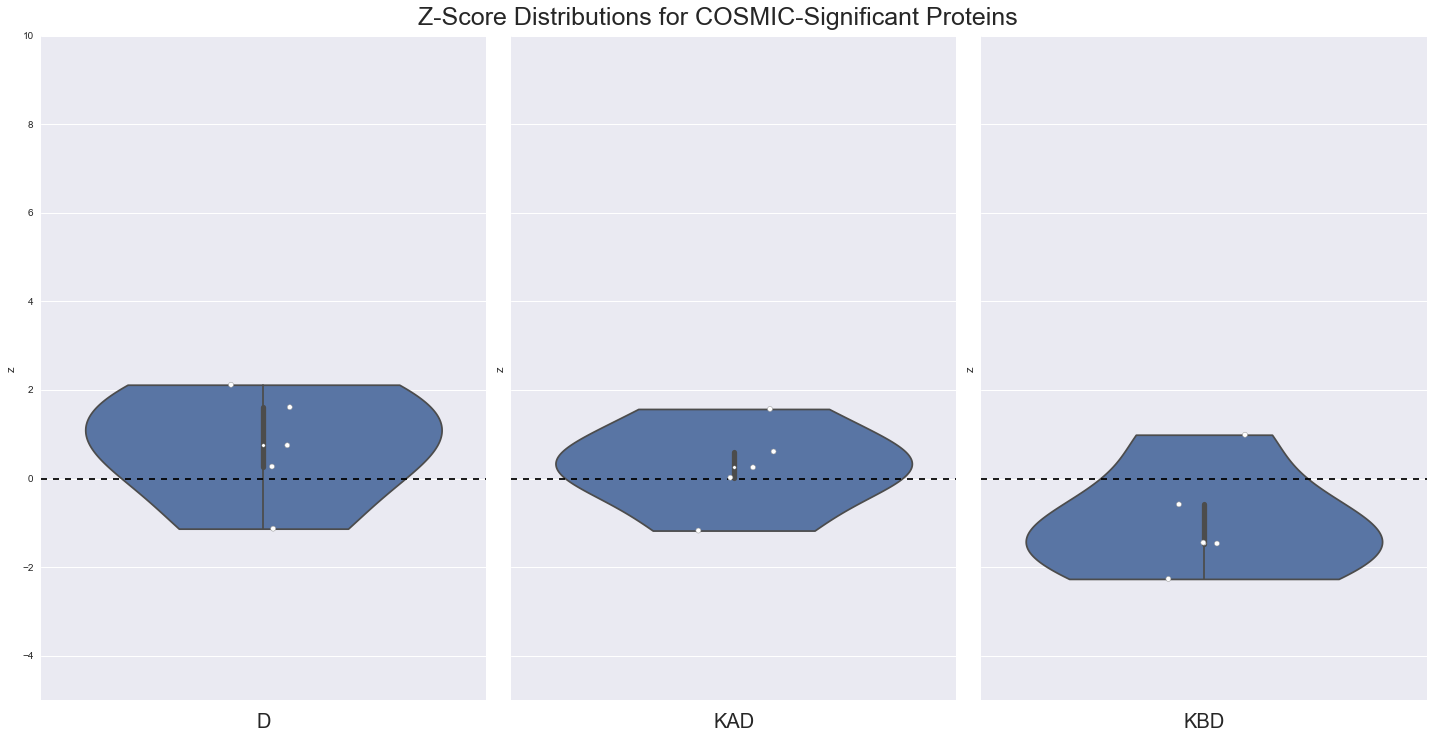

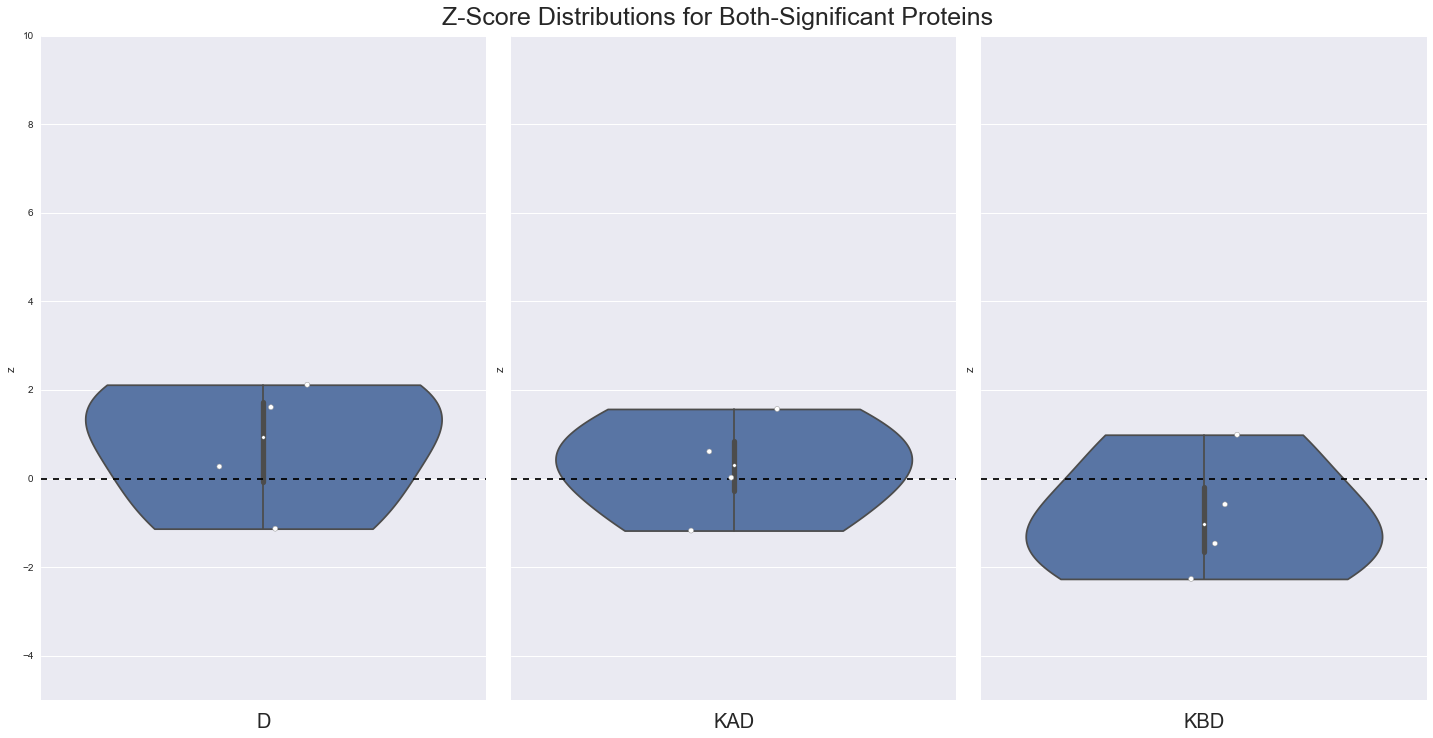

In [78]:
from qvalue import estimate
clinvar = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-06/clinvar/pathogenic_K_summary.txt",delimiter='\t')
cosmic  = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-10/cosmic/recurrence_K_summary.txt",delimiter='\t')
clinvar = clinvar[estimate(clinvar['Kp'])[0]<0.1]
cosmic  = cosmic[estimate(cosmic['Kp'])[0]<0.1]

clinSig = clinvar["structid"].values
cosSig  = cosmic["structid"].values
bothSig = set(clinSig).intersection(cosSig)

print "ClinVar significant: %4d"%len(clinSig)
print "COSMIC significant:  %4d"%len(cosSig)
print "Both significant:    %4d"%len(bothSig)

print "\nProteins where both ClinVar and COSMIC are significant:"
print "ClinVar"
print clinvar.ix[clinvar["structid"].isin(bothSig),["structid","chain","K","Kz","Kp"]].sort_values(by="structid")
print "COSMIC"
print cosmic.ix[cosmic["structid"].isin(bothSig),["structid","chain","K","Kz","Kp"]].sort_values(by="structid")
print "D:"
print D.ix[D["sid"].isin(bothSig),["sid","chain","z","p"]]
print "KAD:"
print KAD.ix[KAD["sid"].isin(bothSig),["sid","chain","z","p"]]
print "KBD:"
print KBD.ix[KBD["sid"].isin(bothSig),["sid","chain","z","p"]]

# ClinVar Significant
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[D["sid"].isin(clinSig),'z'],ax=ax[0],cut=0,orient='v')
sns.stripplot(   D.ix[D["sid"].isin(clinSig),'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD["sid"].isin(clinSig),'z'],ax=ax[1],cut=0,orient='v')
sns.stripplot( KAD.ix[KAD["sid"].isin(clinSig),'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD["sid"].isin(clinSig),'z'],ax=ax[2],cut=0,orient='v')
sns.stripplot( KBD.ix[KBD["sid"].isin(clinSig),'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for ClinVar-Significant Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

# Cosmic Significant
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[D["sid"].isin(cosSig),'z'],ax=ax[0],cut=0,orient='v')
sns.stripplot(   D.ix[D["sid"].isin(cosSig),'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD["sid"].isin(cosSig),'z'],ax=ax[1],cut=0,orient='v')
sns.stripplot( KAD.ix[KAD["sid"].isin(cosSig),'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD["sid"].isin(cosSig),'z'],ax=ax[2],cut=0,orient='v')
sns.stripplot( KBD.ix[KBD["sid"].isin(cosSig),'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for COSMIC-Significant Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

# Both Significant
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[D["sid"].isin(bothSig),  'z'],ax=ax[0],cut=0,orient='v')
sns.stripplot(   D.ix[D["sid"].isin(bothSig),  'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD["sid"].isin(bothSig),'z'],ax=ax[1],cut=0,orient='v')
sns.stripplot( KAD.ix[KAD["sid"].isin(bothSig),'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD["sid"].isin(bothSig),'z'],ax=ax[2],cut=0,orient='v')
sns.stripplot( KBD.ix[KBD["sid"].isin(bothSig),'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for Both-Significant Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [86]:
# Relative clustering between ClinVar and COSMIC
# in proteins where both are clustered in their univariate analysies
print D[D['sid'].isin(['1D5R','2SHP','2Y1M','2K60','2WTK'])]

,sid,chain,Na,Nb,DAB,p,z,z_p,optT,q
84,1D5R,A,41,60,1.911077,0.04048,2.118546,0.034129,10,0.420154
91,2SHP,B,44,25,-1.050666,0.26066,-1.133333,0.257075,6,0.798455
100,2WTK,C,14,10,1.308828,0.09232,1.610919,0.107197,8,0.646240
148,2Y1M,F,9,21,0.242338,0.74360,0.269879,0.787254,11,0.993247


In [87]:
# Spatial segregation of ClinVar from COSMIC
# in proteins where both are clustered in their univariate analysies
print KAD[KAD['sid'].isin(['1D5R','2SHP','2Y1M','2K60','2WTK'])]

,sid,chain,Na,Nb,KAD,p,z,z_p,optT,q
84,1D5R,A,41,60,1.315218,0.14216,1.570968,0.116190,16,0.687879
91,2SHP,B,44,25,-1.065804,0.22374,-1.176230,0.239503,5,0.792303
100,2WTK,C,14,10,0.496211,0.49884,0.609782,0.542006,5,0.954504
148,2Y1M,F,9,21,0.014546,0.84998,0.019492,0.984449,5,1.000000


2K60 was not analayzed, but should have been...

In [89]:
# Spatial segregation of COSMIC from ClinVar
# in proteins where both are clustered in their univariate analysies
print KBD[KBD['sid'].isin(['1D5R','2SHP','2Y1M','2K60','2WTK'])]

      sid chain  Na  Nb       KBD        p         z       z_p  optT         q
84   1D5R     A  41  60 -1.956954  0.00382 -2.268768  0.023282     9  0.423808
91   2SHP     B  44  25  0.863915  0.31784  0.988942  0.322691     9  0.994107
100  2WTK     C  14  10 -1.197975  0.06294 -1.468862  0.141870     7  0.861134
148  2Y1M     F   9  21 -0.521200  0.60596 -0.584062  0.559178     5  1.000000
